# Assignment - Classical Reinforcement Learning 
##Tic-Tac-Toe Agent
​
We are requird to build an Reinforcement Learning Agent (using Q-learning) that will learn to play Numerical Tic-Tac-Toe with odd numbers. 

The environment is coded to play randomly with the agent, i.e. its strategy will be to put an even number randomly in an empty cell. 

Structure of the Notebook is divided in three main parts:
1. Defining MARKOV DECISION PROCESS state framework for Numerical TicTacToe
2. Training of RL Agent using Q-Learning (Model free method)
3. Q-Value tracking of RL Agent. 

Layout of the notebook is as follows:

        - Build Environment TCGame_Env.py for RL Agent
        - Defining epsilon-greedy strategy
        - Tracking state-action pairs for convergence
        - Define hyperparameters for the Q-learning algorithm
        - Generating episode and applying Q-update equation
        - Checking convergence in Q-values




---
Coded by: Abhishek Singh (aulakh.abhishek@gmail.com) 


The program has been executed in[ Google Colab](https://colab.research.google.com/?utm_source=scs-index). 

#### Mounting Google Drive in Colab

In [1]:
# Mount Google Drive in Colab
from google.colab import drive
drive.mount('/content/drive')
home_path = '/content/drive/MyDrive/ML/Reinforcement Learning/'

Mounted at /content/drive


In [2]:
# Append Google Drive path to Python PATH for importing the TicTacToe master class
import sys
sys.path.insert(0,home_path)

#### Importing libraries
Write the code to import Tic-Tac-Toe class from the environment file

In [3]:
from TCGame_Env1 import TicTacToe
import collections
import numpy as np
import random
import pickle
import time
from matplotlib import pyplot as plt

In [4]:
# Function to convert state array into a string to store it as keys in the dictionary
# states in Q-dictionary will be of form: x-4-5-3-8-x-x-x-x
#   x | 4 | 5
#   ----------
#   3 | 8 | x
#   ----------
#   x | x | x

def Q_state(state):

    return ('-'.join(str(e) for e in state)).replace('nan','x')

##### Function to provide a list of valid actions for agent

In [5]:
# Defining a function which will return valid (all possible actions) actions corresponding to a state
# Important to avoid errors during deployment.

def valid_actions(state):

    #valid_Actions = []
    valid_agent_actions, valid_env_actions = env.action_space(state)
    
    #valid_Actions = [i for i in env.action_space(state)[0]] ###### -------please call your environment as env
    agent_actions_list = [action for i, action in enumerate(valid_agent_actions)]
    
    #return valid_Actions
    return agent_actions_list

##### Function to add Q-values (action-state pair) in the Q Dictionary 

In [6]:
# Defining a function which will add new Q-values to the Q-dictionary. 
def add_to_dict(state):
  # new state as the Q-Dictionary key
    new_state_key = Q_state(state)
    
    valid_agent_actions = valid_actions(state)
    if new_state_key not in Q_dict.keys():
        for action in valid_agent_actions:
            Q_dict[new_state_key][action]=0

#### Epsilon-greedy strategy - Write your code here

(you can build your epsilon-decay function similar to the one given at the end of the notebook)

Plot to represent the decay of epsilon for epsilon-greedy policy

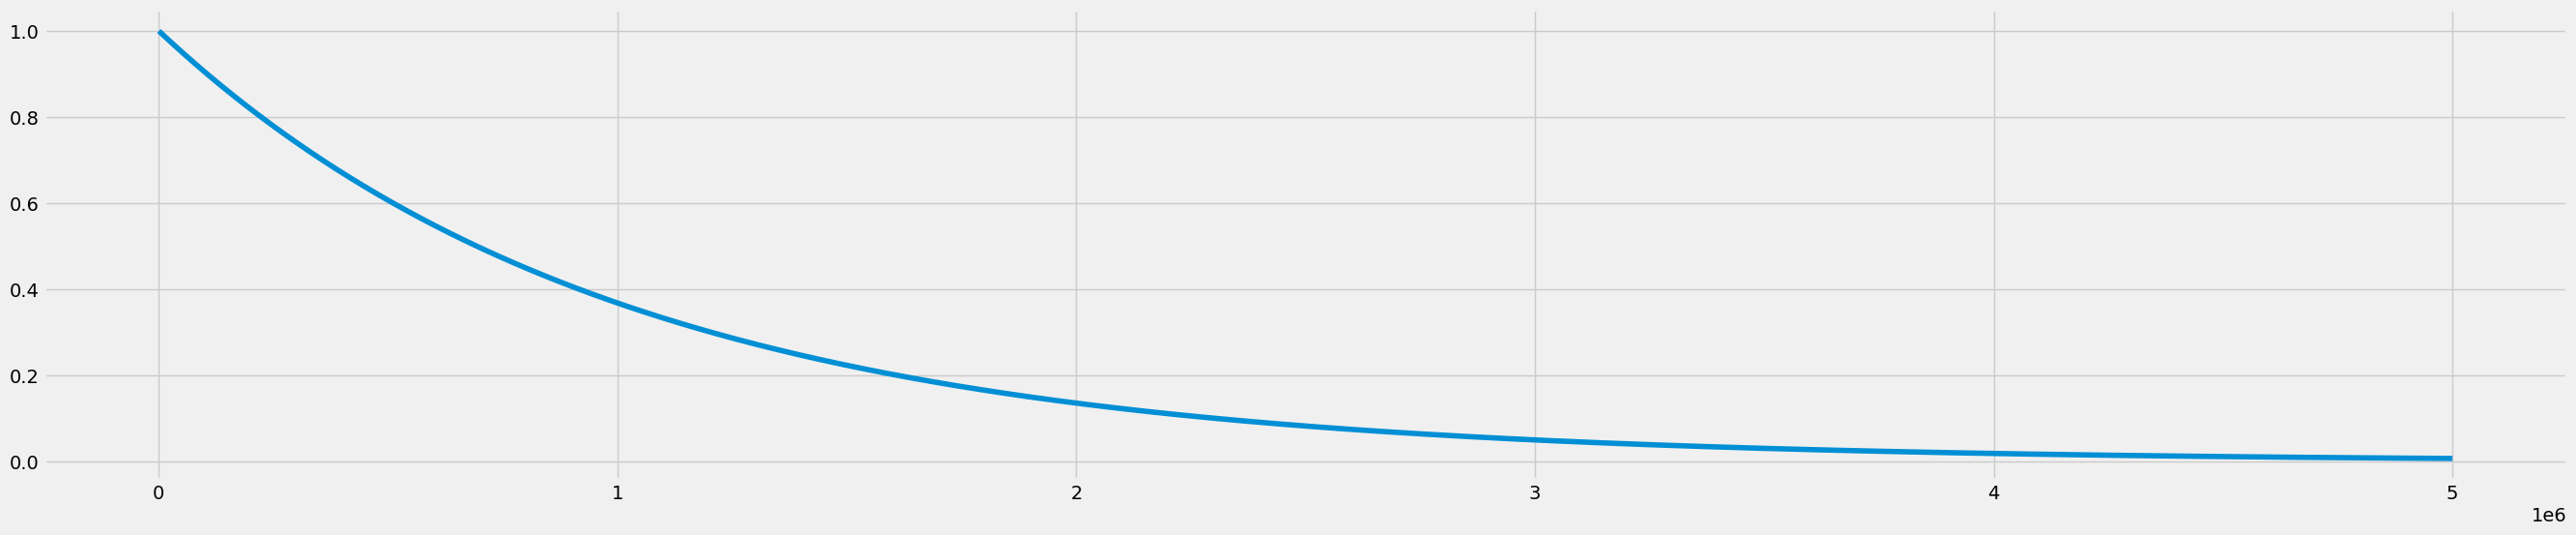

In [18]:
# Defining epsilon-greedy policy. You can choose any function epsilon-decay strategy
max_epsilon = 1.0
min_epsilon = 0.001
episodes = np.arange(0,5000000)
epsilon = []
for i in episodes:
    epsilon.append(min_epsilon + (max_epsilon - min_epsilon) * np.exp(-0.000001*i))
plt.plot(episodes, epsilon)
plt.show()

- Epsilon Greedy stratefy with a decay to follow Exploration of the states in beginning and exploiting only the best policies in the final stages of learning process

0.001 < ϵ < 1.0



In [7]:
def epsilon_greedy_action_policy(state, episodes):
    max_epsilon = 1.0
    min_epsilon = 0.001
    
    random_value = np.random.random()
    epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-0.00001 * episodes)
    
    if random_value > epsilon:
        # exploitation strategy - Agent should pick the action with max Q-value for given state
        state = Q_state(state)
        agent_action = max(Q_dict[state],key=Q_dict[state].get)
    else:
        # exploration strategy - Agent to randomly choose an action from allowed action space
        agent_action = random.choice([action for itr, action in enumerate(env.action_space(state)[0])])
    
    return agent_action

#### Tracking the state-action pairs for checking convergence - write your code here

In [8]:
# Initialise Q_dictionary as 'Q_dict' and States_tracked as 'States_track' (for convergence)

# environment object
env = TicTacToe()

# q-dictionary used for tracking (state, action) pairs with corresponing q-values
Q_dict = collections.defaultdict(dict)

# set of states tracked for convergence
States_track = collections.defaultdict(dict)

# set of states tracked for rewards
Rewards_track = collections.defaultdict(dict)

In [9]:
# Initialise states to be tracked
def initialise_tracking_states():
    state_action_pair = [('x-7-3-x-2-8-x-x-x', (0, 1)),
                         ('x-1-2-x-7-x-x-6-x', (3, 3)),
                         ('x-1-x-x-x-x-8-6-7', (0, 3)),
                         ('6-x-7-x-x-1-x-x-4', (1, 5)),
                         ('x-x-x-4-9-2-7-x-x', (1, 1)),
                         ('x-x-3-8-2-x-x-x-5', (0, 1)),
                         ('3-x-7-x-x-x-x-8-2', (5, 5)),
                         ('2-x-1-8-x-7-x-x-x', (4, 3)),
                         ('1-x-3-x-6-x-x-4-x', (1, 5))] 
    for state, action in state_action_pair:
        States_track[state][action] = list()
        Rewards_track[state] = list()   

In [10]:
#Defining a function to save the Q-dictionary as a pickle file

def save_obj(obj, name ):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

In [11]:
def save_tracking_states():
    for state in States_track.keys():
        for action in States_track[state].keys():
            if state in Q_dict and action in Q_dict[state]:
                States_track[state][action].append(Q_dict[state][action])

In [12]:
initialise_tracking_states()

#### Define hyperparameters  ---write your code here

1. Number of Eplisodes = 5 million
2. Learning Rate (Alpha) = 0.01
3. Gamma (Future Discount Factor) = 0.90
4. Number of episodes for Checkpointing of State = 10 thousand
5. Number of episodes for Checkpointing of Q-value = 50 thousand 

In [13]:
EPISODES = 5000000
#EPISODES = 100000
LEARNING_RATE=0.01
GAMMA = 0.90
checkpoint_state_update_theshold = 10000
checkpoint_qvalue_update_threshold = 50000

### Q-update loop ---write your code here

In [14]:
start_time = time.time()
agent_win_count = 0
env_win_count = 0
tie_count = 0

for episode in range(EPISODES):
    ##### Start writing your code from the next line
    
    # call to build a new environment for current episode
    env = TicTacToe() 

    # initialise the state for env
    current_state = env.state

    # updating the Q-dictionary for Q-learning
    add_to_dict(current_state) 
    reward_state = None
    is_terminal_state = False

    # Strategy to play the game until state is not terminal
    while not is_terminal_state:
      # Epsilon-greedy strategy
      agent_action = epsilon_greedy_action_policy(current_state,episode)

      # Move the game to next state
      next_state, reward, is_terminal_state, msg = env.step(current_state, agent_action)

      add_to_dict(next_state)
      current_state_key = Q_state(current_state)
      reward_state = current_state_key

      if is_terminal_state:
        # terminal state
        if msg == "Agent Win":
          agent_win_count += 1

        elif msg == "Environment Win":
          env_win_count += 1

        else:
          tie_count += 1

        next_best_action = None

        # In terminal state, Q-value of next state will be 0
        Q_dict[Q_state(current_state)][agent_action] += LEARNING_RATE*((reward + (GAMMA*0)) -  Q_dict[Q_state(current_state)][agent_action])
      else:
        #generate the next best action from Q-dictionary
        next_best_action = max(Q_dict[Q_state(next_state)],key=Q_dict[Q_state(next_state)].get)
        #update the Q-value (current_state, agent_action)      
        Q_dict[Q_state(current_state)][agent_action] += LEARNING_RATE * ((reward + (GAMMA *(Q_dict[Q_state(next_state)][next_best_action]))) - Q_dict[Q_state(current_state)][agent_action])
  
      current_state = next_state

      if reward_state in Rewards_track.keys():
        Rewards_track[reward_state].append(reward)
    if (episode + 1) % checkpoint_qvalue_update_threshold == 0:
      print("After %d games, Agent has won: %.4f, Environment has won: %.4f, while %.4f resulted in Tie" 
            % (episode + 1, agent_win_count/(episode + 1), env_win_count/(episode + 1), tie_count/(episode + 1)))
    
    if (episode + 1) % checkpoint_state_update_theshold == 0:
      save_tracking_states()
    
elapsed_time = time.time() - start_time
save_obj(States_track,'States_tracked')   
save_obj(Q_dict,'Policy')

After 50000 games, Agent has won: 0.2533, Environment has won: 0.2789, while 0.4678 resulted in Tie
After 100000 games, Agent has won: 0.2576, Environment has won: 0.2778, while 0.4646 resulted in Tie
After 150000 games, Agent has won: 0.2645, Environment has won: 0.2752, while 0.4603 resulted in Tie
After 200000 games, Agent has won: 0.2712, Environment has won: 0.2714, while 0.4574 resulted in Tie
After 250000 games, Agent has won: 0.2779, Environment has won: 0.2679, while 0.4541 resulted in Tie
After 300000 games, Agent has won: 0.2851, Environment has won: 0.2651, while 0.4498 resulted in Tie
After 350000 games, Agent has won: 0.2920, Environment has won: 0.2614, while 0.4466 resulted in Tie
After 400000 games, Agent has won: 0.2984, Environment has won: 0.2587, while 0.4429 resulted in Tie
After 450000 games, Agent has won: 0.3034, Environment has won: 0.2567, while 0.4398 resulted in Tie
After 500000 games, Agent has won: 0.3081, Environment has won: 0.2551, while 0.4367 resulte

In [27]:
save_obj(States_track, 'tracked_states')

##### Above data is captured into a csv files to plot the performance of Agent vs Env

In [31]:
import pandas as pd
games = pd.read_csv(home_path + 'games.csv')
games = games.set_index('Games')
games.tail(5)

,Agent,Env,Tie
Games,,,
4800000,0.8032,0.0656,0.1312
4850000,0.8046,0.0651,0.1303
4900000,0.8060,0.0645,0.1294
4950000,0.8074,0.0640,0.1286
5000000,0.8087,0.0635,0.1278


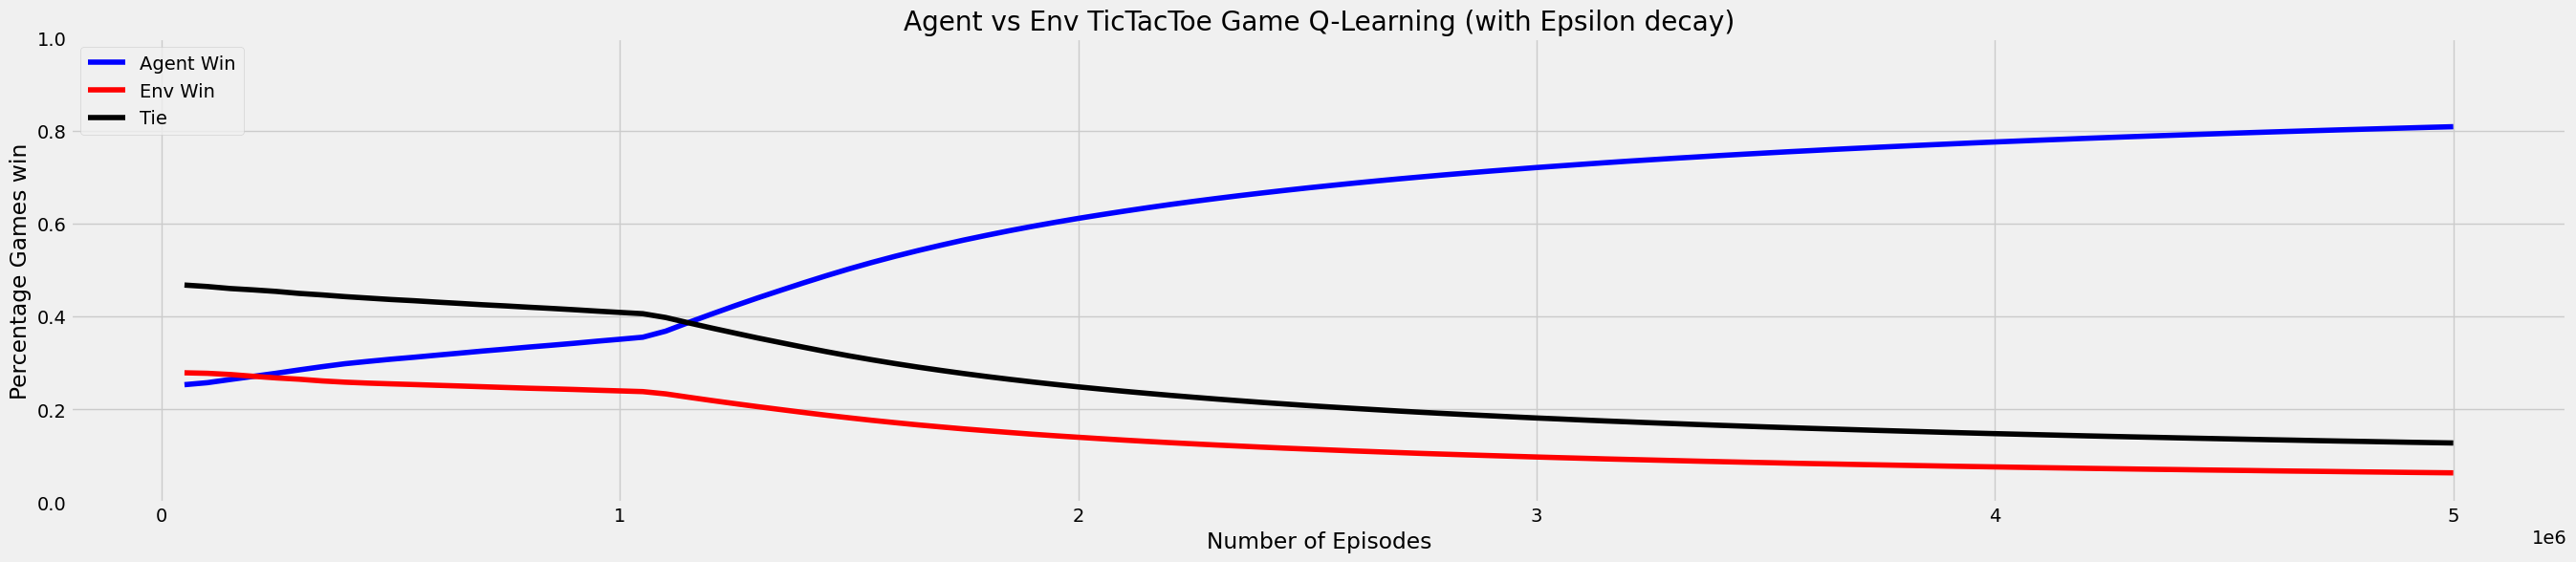

In [32]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams.update({'figure.figsize':(30,6), 'figure.dpi':100})
plt.plot(games.Agent, color='blue',label='Agent Win')
plt.plot(games.Env, color='red', label='Env Win')
plt.plot(games.Tie, color='black', label = 'Tie')
plt.ylim(0,1)
plt.ylabel('Percentage Games win')
plt.xlabel('Number of Episodes')
plt.legend(loc='best')
plt.title('Agent vs Env TicTacToe Game Q-Learning (with Epsilon decay)')
plt.show()

*** We can observer that Agent performance was slowly increasing to 40% after around 1 million episodes, possibly because of Exploration. The Win percentage increases thereafter significantly till it saturauted at around 80% (Exploitation) ***

#### Check the Q-dictionary

In [16]:
Q_dict

defaultdict(dict,
            {'x-x-x-x-x-x-x-x-x': {(0, 1): -1.2444250767695832,
              (0, 3): -1.2485498078346748,
              (0, 5): -1.2510931282074231,
              (0, 7): -1.2505812816857467,
              (0, 9): -1.249340863217806,
              (1, 1): -1.2510890038100764,
              (1, 3): -1.248527060429917,
              (1, 5): -1.245050752976519,
              (1, 7): -1.2466557822607665,
              (1, 9): -1.2506905964962423,
              (2, 1): -1.2489787473081135,
              (2, 3): -1.2486309328429575,
              (2, 5): -1.2480545078571827,
              (2, 7): -1.2506768485735982,
              (2, 9): -1.2434407939744392,
              (3, 1): -1.2477431178789402,
              (3, 3): -1.2508896040935524,
              (3, 5): 5.146586787560395,
              (3, 7): -1.2518226359685827,
              (3, 9): -1.250791595684906,
              (4, 1): -1.2529489032531713,
              (4, 3): -1.25056860224634,
              (4, 5): -

In [26]:
len(Q_dict)

1457902

The length of Q_dict (State-Action pair value dictionary) is close to 1.5 million

In [18]:
# try checking for one of the states - that which action your agent thinks is the best  -----This will not be evaluated
random_state_key= np.random.choice(list(Q_dict.keys()))
random_state_key

'8-1-5-3-4-9-6-x-x'

In [19]:
## Dictionary of all state-action pairs and their respective Q_values for the 'random_state_key'
Q_val_random = Q_dict[random_state_key]

## Tuples with action pairs and Q-values for 'random_state_key'
sorted_tuples= sorted(Q_val_random.items(), key= lambda item: item[1], reverse= True) 

## Sorted dictionary of action and Q-value pairs using sorted_tuples
sorted_dict= {}
sorted_dict= {k:v for k,v in sorted_tuples}  #Sorted dictionary (reverse: descending order of values)
print(sorted_dict)

{(7, 7): 0, (8, 7): 0}


In [20]:
##Selecting the best action for the state 'random_state_key' (Finding the action with max Q value for 'random_state_key')
import itertools

#Best action for the random_state_key
print(f"The best action for state '{random_state_key}' is:")
list(dict(itertools.islice(sorted_dict.items(), 1)).keys())[0]

The best action for state '8-1-5-3-4-9-6-x-x' is:


(7, 7)

#### Check the states tracked for Q-values convergence
(non-evaluative)

In [21]:
# Write the code for plotting the graphs for state-action pairs tracked
Rewards_track
#States_track

defaultdict(dict,
            {'1-x-3-x-6-x-x-4-x': [10, -10, 10, 10, 10, 10],
             '2-x-1-8-x-7-x-x-x': [-1, -1, -1, -1, -1, -1],
             '3-x-7-x-x-x-x-8-2': [-1, -1, -10, 10, 10, 10],
             '6-x-7-x-x-1-x-x-4': [-1, -1],
             'x-1-2-x-7-x-x-6-x': [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
             'x-1-x-x-x-x-8-6-7': [-1, -10, -1, -1, -1, -1],
             'x-7-3-x-2-8-x-x-x': [-1, -1, -1, 10, 10, 10],
             'x-x-3-8-2-x-x-x-5': [-1, -1, -1, -1, -10, -1],
             'x-x-x-4-9-2-7-x-x': []})

In [22]:
#plt.figure(0, figsize=(20,15))

state_track_val = collections.defaultdict(dict)

for state in States_track.keys():
    for action in States_track[state].keys():
        qvals = States_track[state][action]
        total_tracked_values = len(qvals)
        state_track_val[state][action] = total_tracked_values
            
state_track_val

defaultdict(dict,
            {'1-x-3-x-6-x-x-4-x': {(1, 5): 500},
             '2-x-1-8-x-7-x-x-x': {(4, 3): 479},
             '3-x-7-x-x-x-x-8-2': {(5, 5): 497},
             '6-x-7-x-x-1-x-x-4': {(1, 5): 499},
             'x-1-2-x-7-x-x-6-x': {(3, 3): 489},
             'x-1-x-x-x-x-8-6-7': {(0, 3): 496},
             'x-7-3-x-2-8-x-x-x': {(0, 1): 498},
             'x-x-3-8-2-x-x-x-5': {(0, 1): 493},
             'x-x-x-4-9-2-7-x-x': {(1, 1): 488}})

#### Plot to track the Q-value convergence 

In [23]:
def plot_q_val_convergence(state, action):

    iterations = state_track_val[state][action]
    plt.plot(range(0, iterations), States_track[state][action])
    
    
    plt.ylabel("Q_value")
    
    plt.title("State : {0} - action : {1}".format(state, action))
    plt.legend(["Q-value"], loc="lower right")

<Figure size 1440x1080 with 0 Axes>

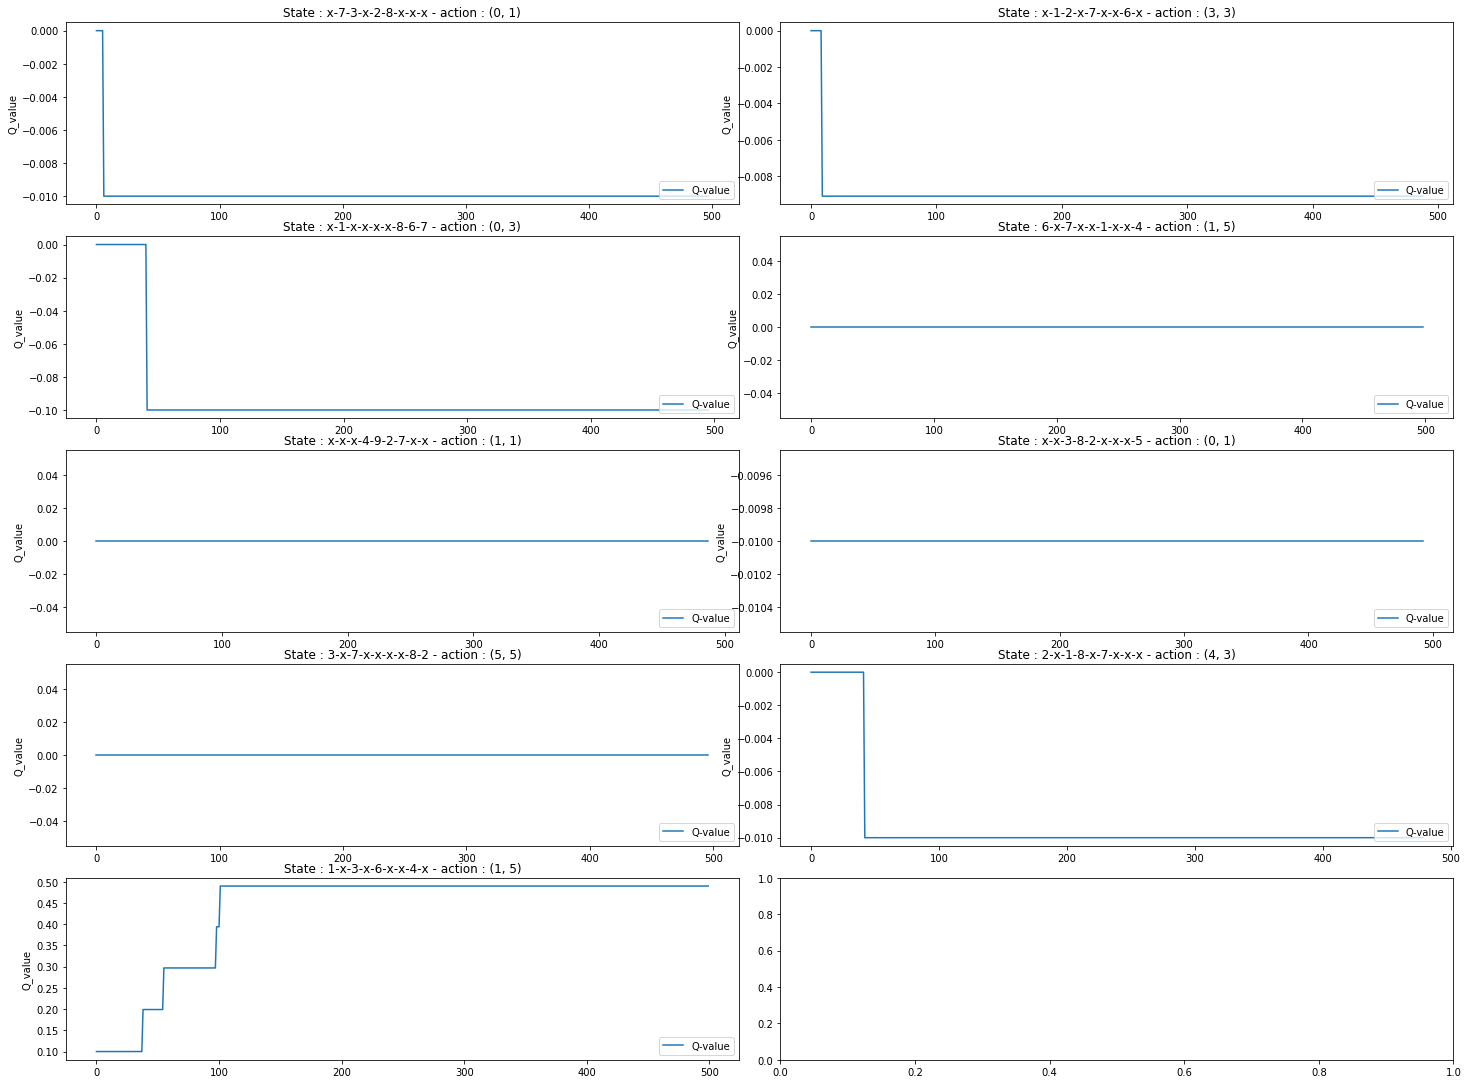

In [24]:
plt.figure(0, figsize=(20, 15))

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 15))
fig.tight_layout()

subplots = [i for i in range(521, 530)]

i = 0

for state in state_track_val.keys():
    for action in state_track_val[state].keys():
        plt.subplot(subplots[i])
        plot_q_val_convergence(state, action)
        i +=1

plt.show()

Convergence Plot for few selected state

<function matplotlib.pyplot.show>

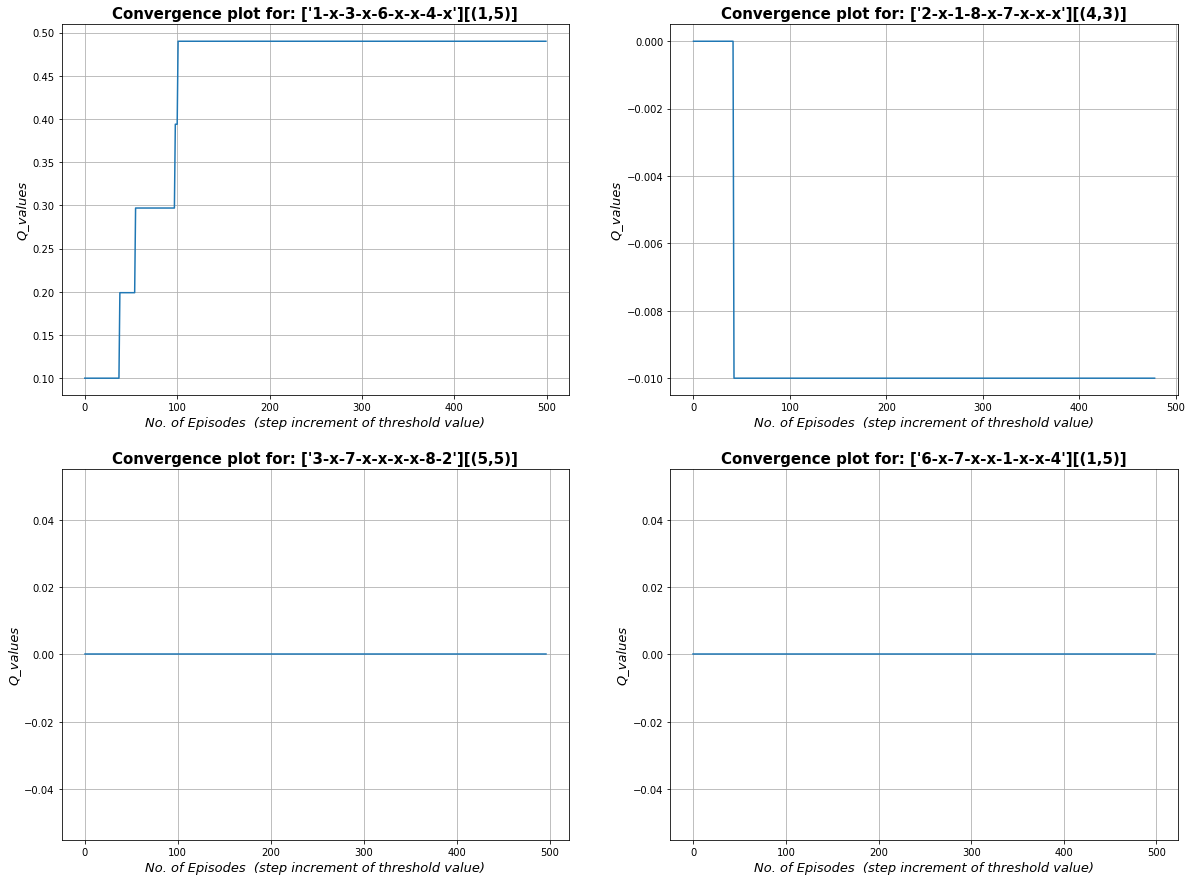

In [25]:
plt.figure(0, figsize=(20,15))



#Graph 1: Convergence Plot for state-action pair: ['1-x-3-x-6-x-x-4-x'][(1,5)]
x_axis = np.asarray(range(0, len(States_track['1-x-3-x-6-x-x-4-x'][(1,5)])))
plt.subplot(221)
plt.plot(x_axis,np.asarray(States_track['1-x-3-x-6-x-x-4-x'][(1,5)]))
plt.title("Convergence plot for: ['1-x-3-x-6-x-x-4-x'][(1,5)]", fontsize=15, fontweight='bold')
plt.ylabel("Q_values", fontsize=13, fontstyle='italic')
plt.xlabel("No. of Episodes  (step increment of threshold value)", fontsize=13, fontstyle='italic')
plt.grid(True)
plt.show

#Graph 2: Convergence Plot for state-action pair: ['2-x-1-8-x-7-x-x-x'][(4,3)]
x_axis = np.asarray(range(0, len(States_track['2-x-1-8-x-7-x-x-x'][(4,3)])))
plt.subplot(222)
plt.plot(x_axis,np.asarray(States_track['2-x-1-8-x-7-x-x-x'][(4,3)]))
plt.title("Convergence plot for: ['2-x-1-8-x-7-x-x-x'][(4,3)]", fontsize=15, fontweight='bold')
plt.ylabel("Q_values", fontsize=13, fontstyle='italic')
plt.xlabel("No. of Episodes  (step increment of threshold value)", fontsize=13, fontstyle='italic')
plt.grid(True)
plt.show

#Graph 3: Convergence Plot for state-action pair: ['3-x-7-x-x-x-x-8-2'][(5,5)]
x_axis = np.asarray(range(0, len(States_track['3-x-7-x-x-x-x-8-2'][(5,5)])))
plt.subplot(223)
plt.plot(x_axis,np.asarray(States_track['3-x-7-x-x-x-x-8-2'][(5,5)]))
plt.title("Convergence plot for: ['3-x-7-x-x-x-x-8-2'][(5,5)]", fontsize=15, fontweight='bold')
plt.ylabel("Q_values", fontsize=13, fontstyle='italic')
plt.xlabel("No. of Episodes  (step increment of threshold value)", fontsize=13, fontstyle='italic')
plt.grid(True)
plt.show

#Graph 4: Convergence Plot for state-action pair: ['6-x-7-x-x-1-x-x-4'][(1,5)]
x_axis = np.asarray(range(0, len(States_track['6-x-7-x-x-1-x-x-4'][(1,5)])))
plt.subplot(224)
plt.plot(x_axis,np.asarray(States_track['6-x-7-x-x-1-x-x-4'][(1,5)]))
plt.title("Convergence plot for: ['6-x-7-x-x-1-x-x-4'][(1,5)]", fontsize=15, fontweight='bold')
plt.ylabel("Q_values", fontsize=13, fontstyle='italic')
plt.xlabel("No. of Episodes  (step increment of threshold value)", fontsize=13, fontstyle='italic')
plt.grid(True)
plt.show

### Epsilon - decay check

In [ ]:
max_epsilon = 1.0
min_epsilon = 0.001
time = np.arange(0,5000000)
epsilon = []
for i in range(0,5000000):
    epsilon.append(min_epsilon + (max_epsilon - min_epsilon) * np.exp(-0.000001*i))

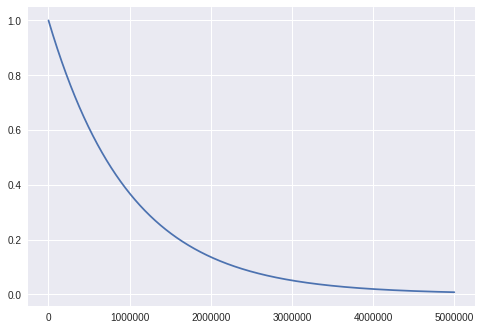

In [ ]:
plt.plot(time, epsilon)
plt.show()



---



---

